## Gather the data

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_ddg(apo_dg, complex_dg):
    return complex_dg * KT_KCALMOL - apo_dg * KT_KCALMOL

def compute_error(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5 * KT_KCALMOL

In [3]:
# Retrieve free energies

main_dir_og = 47
main_dir_og2 = 45
main_dir_rest = 52
sub_dirs = list(range(0, 4)) + list(range(5, 12)) + list(range(13, 17)) + list(range(18, 28))

d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
            main_dir = main_dir_rest
            if sub_dir in [19, 21]:
                replicate = 1
            else:
                replicate = 0
        else:
            length = 10
            main_dir = main_dir_og
            replicate = 1
            
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results

d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in d_mapping.keys():
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
            main_dir = main_dir_rest
            sub_dir_final = sub_dir
            replicate = 0
        else:
            length = 10
            main_dir = main_dir_og2
            sub_dir_final = d_mapping[sub_dir]
            if sub_dir_final == 11:
                replicate = 0
            else:
                replicate = 1
        
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir_final}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results
        

In [4]:
# Format the data appropriately for cinnabar

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]

to_plot = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg, dddg*2, 0])
    else:
        to_plot.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg * -1, dddg*2, 0])


In [5]:
to_plot

[['Y29', 'F29', 0.837734436394328, 0.7013987349366633, 0],
 ['Y29', 'A29', 1.8498112959831658, 0.8488566977135539, 0],
 ['W38', 'F38', 0.053753372945006817, 0.9635271417908515, 0],
 ['T42', 'A42', 0.8924352772691933, 0.5153257852601384, 0],
 ['W44', 'F44', 0.42709806720309884, 0.9019485744191662, 0],
 ['E76', 'A76', 0.8007754184594734, 1.4480394737620523, 0],
 ['E80', 'A80', 0.10110859365214786, 1.4577355980951345, 0],
 ['D35', 'A35', 1.176679047197878, 1.1404444826131526, 0],
 ['D39', 'A39', 6.462788148992341, 1.1377245018157507, 0],
 ['K27', 'A27', 2.795742289639051, 1.3687599445871335, 0],
 ['R59', 'A59', 3.75017338663973, 1.5205352417583822, 0],
 ['R83', 'Q83', 1.995752829087074, 1.1595673679114653, 0],
 ['R87', 'A87', 6.997693978380269, 1.1952217637595801, 0],
 ['H102', 'A102', 6.842373553462718, 0.5799253695382593, 0],
 ['-F29', '-Y29', 0.8846591017023435, 0.9471178849218759, 0],
 ['-A29', '-Y29', 1.3333941144661665, 0.8779518390710238, 0],
 ['-F38', '-W38', 0.8126016859941994, 0

In [6]:
# Get the discrepancy between forward and negative reverse DDGs

for i in range(14):
    print(to_plot[i][0:2], to_plot[i][2] - to_plot[i+14][2])

['Y29', 'F29'] -0.046924665308015534
['Y29', 'A29'] 0.5164171815169993
['W38', 'F38'] -0.7588483130491925
['T42', 'A42'] 0.2611415697209978
['W44', 'F44'] -0.27089535934038933
['E76', 'A76'] -0.3686517001324813
['E80', 'A80'] -0.40173715833447865
['D35', 'A35'] -1.1904058885818798
['D39', 'A39'] -0.6830463071128365
['K27', 'A27'] 0.02937175033218864
['R59', 'A59'] -0.34656876444331886
['R83', 'Q83'] 0.045622255686730284
['R87', 'A87'] 0.8101104081251407
['H102', 'A102'] 0.23377772600100144


In [7]:
# Get the discrepancy between forward and negative reverse DDGs (including 95% CI error bars)

labels_internal_consistency = []
for i in range(14):
    discrepancy = round(to_plot[i][2] - to_plot[i+14][2], 2)
    forward_ddg = round(to_plot[i][2], 2)
    reverse_ddg = round(to_plot[i+14][2], 2)
    forward_ci = [round(to_plot[i][2] - to_plot[i][3], 2), round(to_plot[i][2] + to_plot[i][3])]
    reverse_ci = [round(to_plot[i+14][2] - to_plot[i+14][3], 2), round(to_plot[i+14][2] + to_plot[i+14][3])]
    forward_ci_extended = [forward_ci[0] - 1, forward_ci[1] + 1]
    reverse_ci_extended = [reverse_ci[0] - 1, reverse_ci[1] + 1]
    is_within_error = (forward_ci_extended[0] <= reverse_ddg and reverse_ddg <= forward_ci_extended[1]) or (reverse_ci_extended[0] <= forward_ddg and forward_ddg <= reverse_ci_extended[1])
    print(to_plot[i][0:2], discrepancy, forward_ddg, forward_ci, reverse_ddg, reverse_ci, is_within_error)
    if not is_within_error:
        labels_internal_consistency.append(titles[i])
    else:
        labels_internal_consistency.append("")
    

['Y29', 'F29'] -0.05 0.84 [0.14, 2] 0.88 [-0.06, 2] True
['Y29', 'A29'] 0.52 1.85 [1.0, 3] 1.33 [0.46, 2] True
['W38', 'F38'] -0.76 0.05 [-0.91, 1] 0.81 [-0.13, 2] True
['T42', 'A42'] 0.26 0.89 [0.38, 1] 0.63 [0.12, 1] True
['W44', 'F44'] -0.27 0.43 [-0.47, 1] 0.7 [-0.33, 2] True
['E76', 'A76'] -0.37 0.8 [-0.65, 2] 1.17 [-0.38, 3] True
['E80', 'A80'] -0.4 0.1 [-1.36, 2] 0.5 [-1.04, 2] True
['D35', 'A35'] -1.19 1.18 [0.04, 2] 2.37 [0.99, 4] True
['D39', 'A39'] -0.68 6.46 [5.33, 8] 7.15 [5.76, 9] True
['K27', 'A27'] 0.03 2.8 [1.43, 4] 2.77 [1.48, 4] True
['R59', 'A59'] -0.35 3.75 [2.23, 5] 4.1 [2.71, 5] True
['R83', 'Q83'] 0.05 2.0 [0.84, 3] 1.95 [0.53, 3] True
['R87', 'A87'] 0.81 7.0 [5.8, 8] 6.19 [4.97, 7] True
['H102', 'A102'] 0.23 6.84 [6.26, 7] 6.61 [6.15, 7] True


In [8]:
# Get the discrepancy from experiment

experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]
for i in range(28):
    print(to_plot[i][0:2], to_plot[i][2] - experiment[i])
    

['Y29', 'F29'] 0.937734436394328
['Y29', 'A29'] -1.550188704016834
['W38', 'F38'] -1.5462466270549933
['T42', 'A42'] -0.9075647227308068
['W44', 'F44'] 0.42709806720309884
['E76', 'A76'] -0.5992245815405265
['E80', 'A80'] -0.39889140634785214
['D35', 'A35'] -3.323320952802122
['D39', 'A39'] -1.2372118510076593
['K27', 'A27'] -2.604257710360949
['R59', 'A59'] -1.44982661336027
['R83', 'Q83'] -3.4042471709129263
['R87', 'A87'] 1.4976939783802692
['H102', 'A102'] 0.742373553462718
['-F29', '-Y29'] 0.9846591017023435
['-A29', '-Y29'] -2.0666058855338334
['-F38', '-W38'] -0.7873983140058007
['-A42', '-T42'] -1.1687062924518046
['-F44', '-W44'] 0.6979934265434882
['-A76', '-E76'] -0.23057288140804522
['-A80', '-E80'] 0.00284575198662651
['-A35', '-D35'] -2.132915064220242
['-A39', '-D39'] -0.5541655438948228
['-A27', '-K27'] -2.633629460693138
['-A59', '-R59'] -1.1032578489169511
['-Q83', '-R83'] -3.4498694265996566
['-A87', '-R87'] 0.6875835702551285
['-A102', '-H102'] 0.5085958274617166


In [9]:
# Get the discrepancy from experiment (including 95% CI error bars for predicted and experiment)

labels_accuracy = []
experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]
for i in range(28):
    discrepancy = round(to_plot[i][2] - experiment[i], 2)
    predicted_ci = [round(to_plot[i][2] - to_plot[i][3], 2), round(to_plot[i][2] + to_plot[i][3], 2)]
    predicted_ci_extended = [predicted_ci[0] - 1, predicted_ci[1] + 1]
    is_within_error = experiment[i] + 0.2 > predicted_ci_extended[0] and experiment[i] - 0.2 < predicted_ci_extended[1]
    print(to_plot[i][0:2], discrepancy, experiment[i], predicted_ci_extended, is_within_error)
    if not is_within_error:
        if i >= 14:
            labels_accuracy.append(f"-({titles[i]})")
        else:
            labels_accuracy.append(titles[i])
    else:
        labels_accuracy.append("")
    

['Y29', 'F29'] 0.94 -0.1 [-0.86, 2.54] True
['Y29', 'A29'] -1.55 3.4 [0.0, 3.7] True
['W38', 'F38'] -1.55 1.6 [-1.9100000000000001, 2.02] True
['T42', 'A42'] -0.91 1.8 [-0.62, 2.41] True
['W44', 'F44'] 0.43 0 [-1.47, 2.33] True
['E76', 'A76'] -0.6 1.4 [-1.65, 3.25] True
['E80', 'A80'] -0.4 0.5 [-2.3600000000000003, 2.56] True
['D35', 'A35'] -3.32 4.5 [-0.96, 3.32] False
['D39', 'A39'] -1.24 7.7 [4.33, 8.6] True
['K27', 'A27'] -2.6 5.4 [0.42999999999999994, 5.16] False
['R59', 'A59'] -1.45 5.2 [1.23, 6.27] True
['R83', 'Q83'] -3.4 5.4 [-0.16000000000000003, 4.16] False
['R87', 'A87'] 1.5 5.5 [4.8, 9.19] True
['H102', 'A102'] 0.74 6.1 [5.26, 8.42] True
['-F29', '-Y29'] 0.98 -0.1 [-1.06, 2.83] True
['-A29', '-Y29'] -2.07 3.4 [-0.54, 3.21] True
['-F38', '-W38'] -0.79 1.6 [-1.13, 2.76] True
['-A42', '-T42'] -1.17 1.8 [-0.88, 2.15] True
['-F44', '-W44'] 0.7 0 [-1.33, 2.73] True
['-A76', '-E76'] -0.23 1.4 [-1.38, 3.72] True
['-A80', '-E80'] 0.0 0.5 [-2.04, 3.05] True
['-A35', '-D35'] -2.13 4.

In [12]:
# Assemble experimental values

d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 
     'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5, 'F29': 19.1, 
     'A29': 15.6, 'F38': 17.4, 'A42': 17.2, 'F44': 19.0, 'A102': 12.9,
     
    '-A27': -13.6, '-A59': -13.8, '-Q83': -13.6, '-A87': -13.5, 
     '-A35': -14.5, '-A39': -11.3, '-A76': -17.65, '-A80': -18.5, '-F29': -19.1, 
     '-A29': -15.6, '-F38': -17.4, '-A42': -17.2, '-F44': -19.0, '-A102': -12.9
    }

experiment = []
for k in d.keys():
    if k == 'WT':
        for wt_residue in ['K27', 'R59', 'R83', 'R87', 'H102', 
                           'D35', 'D39', 'E76', 'E80',
                           'Y29', 'W38', 'T42', 'W44']:
            experiment.append([wt_residue, d[k]*-1, 0.1*2]) 
            experiment.append(["-" + wt_residue, d[k], 0.1*2])
    else:
        experiment.append([k, d[k]*-1, 0.1*2]) 
        
# Note: we take the negative of everything because the free energies are subtracted differently in Schreiber et al

## Calculated vs experiment plot

In [10]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from cinnabar import plotting, stats, wrangle

In [14]:
# Write csv with data
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_rest_50ns.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [11]:
# Create map with the csv file
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_rest_50ns.csv')


Graph is not connected enough to compute absolute values


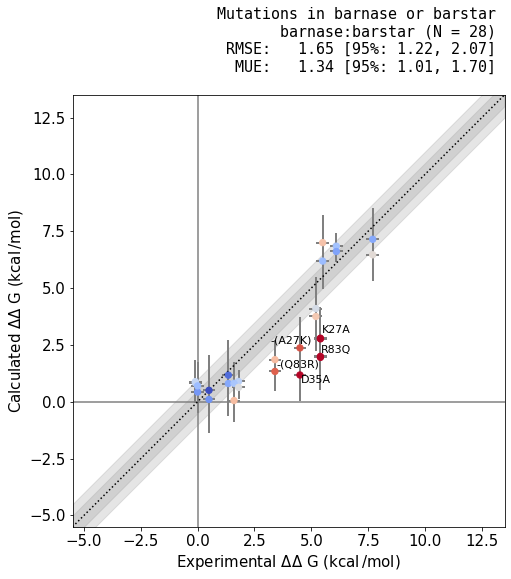

In [12]:
# Format data appropriately
x = [edge[2]["exp_DDG"] for edge in fe.graph.edges(data=True)]
y = [edge[2]["calc_DDG"] for edge in fe.graph.edges(data=True)]
xerr = np.asarray([edge[2]["exp_dDDG"] for edge in fe.graph.edges(data=True)])
yerr = np.asarray([edge[2]["calc_dDDG"] for edge in fe.graph.edges(data=True)])
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_rest_50ns.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="Mutations in barnase or barstar",
    target_name="barnase:barstar",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    xy_lim=[-5.5, 13.5],
    data_labels=labels_accuracy,
#     data_labels=titles,
    font_sizes={"title":15, "labels": 11, "other": 15},
    scatter_kwargs={'s': 40}
)

## -Reverse vs Forward

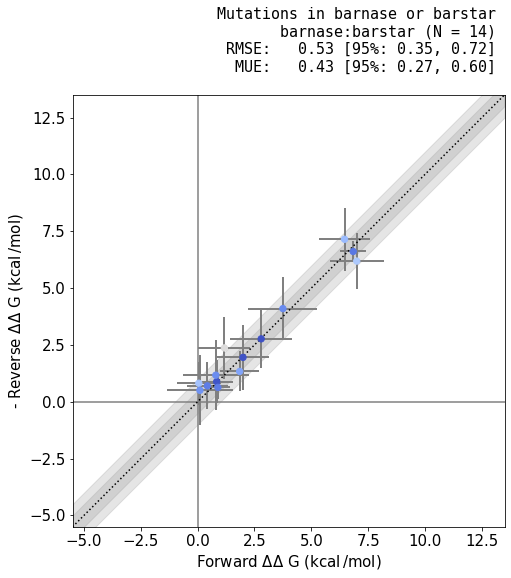

In [17]:
# Format the data appropriately
x = [entry[2] for i, entry in enumerate(to_plot) if i < 14] # forward
y = [entry[2] for i, entry in enumerate(to_plot) if i >= 14] # reverse
xerr =  [entry[3] for i, entry in enumerate(to_plot) if i < 14] # forward
yerr = [entry[3] for i, entry in enumerate(to_plot) if i >= 14] # reverse
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_rest_internal_consistency_50ns.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="Mutations in barnase or barstar",
    target_name="barnase:barstar",
    xlabel="Forward",
    ylabel="- Reverse",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    xy_lim=[-5.5, 13.5],
    data_labels=labels_internal_consistency,
    font_sizes={"title":15, "labels": 11, "other": 15},
    scatter_kwargs={'s': 40})
